In [96]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [88]:
num_col

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [89]:
df = pd.read_csv('income_prediction_dataset.csv')
df.drop(['native-country', 'workclass', 'education', 'occupation',
         'race', 'capital-gain', 'capital-loss'], axis=1, inplace=True)
print(df.shape)
df.head()

(899, 7)


,age,fnlwgt,educational-num,marital-status,relationship,gender,hours-per-week
0,39,327120,9,Married-civ-spouse,Husband,Male,40
1,32,123253,12,Married-civ-spouse,Husband,Male,42
2,47,232628,9,Married-civ-spouse,Husband,Male,40
3,19,374262,8,Never-married,Own-child,Male,20
4,46,311231,9,Married-civ-spouse,Husband,Male,40


In [91]:
cat_col = list(df.select_dtypes(include='object').columns)
num_col =[el for el in df.columns if el not in cat_col]
cat_col.remove('gender')
y = df['gender']

In [92]:
df_cat = pd.get_dummies(df[cat_col])
sc = StandardScaler()
X_num = sc.fit_transform(df[num_col])
df_num = pd.DataFrame(X_num, columns=num_col)
X = pd.concat([df_num, df_cat], axis = 1)
y = LabelEncoder().fit_transform(y)
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [101]:
rfc = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 61  37]
 [ 25 174]]
              precision    recall  f1-score   support

           0       0.71      0.62      0.66        98
           1       0.82      0.87      0.85       199

    accuracy                           0.79       297
   macro avg       0.77      0.75      0.76       297
weighted avg       0.79      0.79      0.79       297



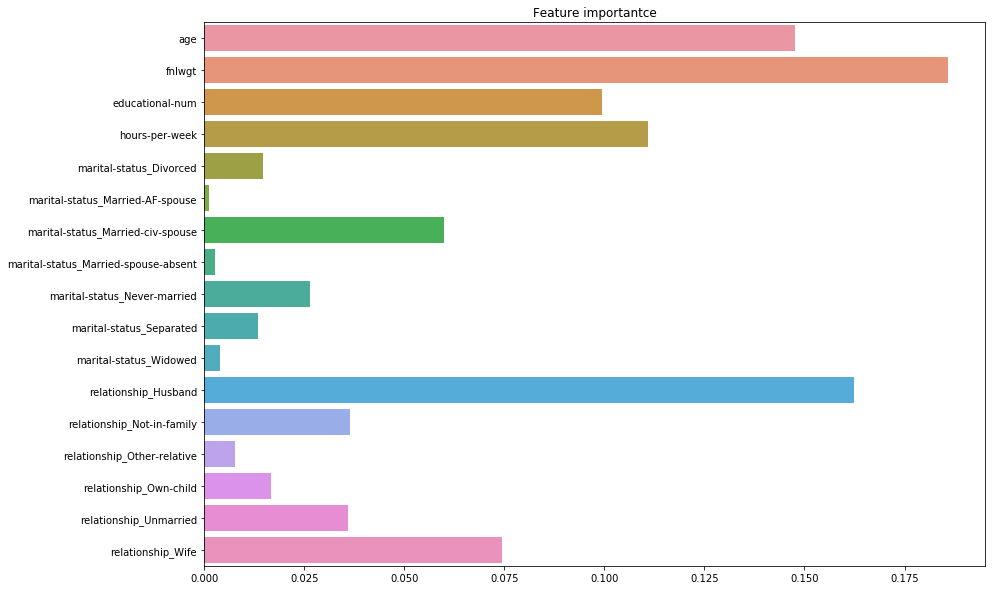

In [99]:
f,axs = plt.subplots(figsize =(14,10))
axs = sns.barplot(x = rfc.feature_importances_, y = X.columns)
plt.title('Feature importantce')
plt.show()

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race']

In [98]:
#param_search
param_grid = {
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimators'

In [100]:
CV_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

2021-07-29 09:58:48.936 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


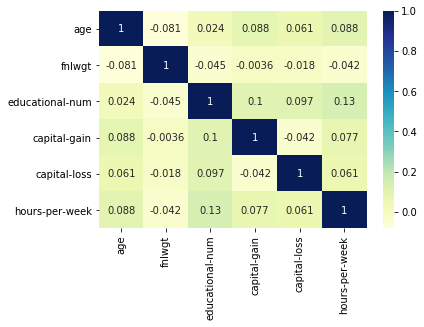

In [45]:
sns.heatmap(df[num_col].corr(), annot = True, cmap = 'YlGnBu')